# **CSE655 Homework 1**

* **GTU Artificial Intelligence MSc.**
* **Student Name:** Berkin Barış Yılmaz
* **ID:** 244201001109

* [github.com/Berkin99/DeepLearning](https://github.com/Berkin99/DeepLearning)

## **Part 1: Training a Deep Feed Forward Network for Multidimensional Regression.**




### **Code:**



#### **Model training:**
#### **1. Choose 𝑁t to be 1000.**
#### **2. In your training data add some noise to 𝑦t’s from a normal distribution with 𝜇 = 0.0 and 𝜎 = 0.001.**
#### **3. Build a feed forward network with exactly 3 hidden layers:**
* Each layer should include exactly 6 nodes in the beginning.
* Use a combination of activation functions in these layers (use the same activation foreach node at a given layer).

#### **4. Define your loss function:**
* Use MSE for loss function.

#### **5. Train your algorithm with SGD.**
* Use appropriate learning rates and the number of epochs.
* Report the training and validation errors.

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

def function(x):
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    y1 = x1 * x3 + 1.2 * x1 * x5 - x6 * x7 * x8 - 2 * x1**2 * x8 + x5
    y2 = x1 * x5 * x6 - x3 * x4 - 3 * x2 * x3 + 2 * x2**2 * x4 - 2 * x7 * x8 - 1
    y3 = 2 * x3**2 - x5 * x7 - 3 * x1 * x4 * x6 - x1**2 * x2 * x4 - 1
    y4 = -x6**3 + 2 * x1 * x3 * x8 - x1 * x4 * x7 - 2 * x5**2 * x2 * x4 - x8
    y5 = x1**2 * x5 - 3 * x3 * x4 * x8 + x1 * x2 * x4 - 3 * x6 - x1**2 * x7 + 2
    y6 = x1**2 * x3 * x6 - x3 * x5 * x7 + x3 * x4 + 2.2 * x4 + x2**2 * x3 - 2.1
    return [y1, y2, y3, y4, y5, y6]

Nt = 1000
Nv = 1000

np.random.seed(0)
# xdata = np.random.uniform(-1, 1, (2000, 8))
# ydata = np.array([function(x) for x in xdata])

# xt, yt = xdata[:1000], ydata[:1000]
# xv, yv = xdata[1000:], ydata[1000:]

xv = np.random.uniform(-1, 1, (1000, 8))
yv = np.array([function(x) for x in xv])
xt = np.random.uniform(-1, 1, (1000, 8))
yt = np.array([function(x) for x in xt])


# Add noise to the training data 0 , 0.001
noise = np.random.normal(0, 0.001, yt.shape)
yt = yt + noise

# Homework does not say add noise to validation data : 
# noise = np.random.normal(0, 0.001, yv.shape)
# yv = yv + noise

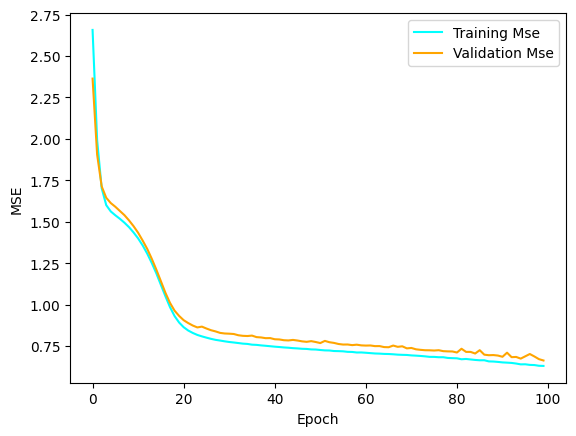

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5961 - mse: 0.5961
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.6823 - mse: 0.6823
Training MSE: 0.6225905418395996
Validation MSE: 0.6621546149253845


In [ ]:

model = models.Sequential([
    layers.Dense(6, activation='relu', input_shape=(8,)),
    layers.Dense(6, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(6, activation='linear')
])

# Compile
model.compile(optimizer=SGD(learning_rate=0.03), loss='mse', metrics=['mse'])

history = model.fit(
    xt, yt,
    epochs = 100,
    validation_data = (xv, yv),
    verbose = 0,
    batch_size = 32
)

plt.plot(history.history['mse'], label='Training Mse', color='cyan')
plt.plot(history.history['val_mse'], label='Validation Mse', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

trainMse, acc = model.evaluate(xt, yt)
valMse, acc = model.evaluate(xv, yv)

print(f"Training MSE: {trainMse}")
print(f"Validation MSE: {valMse}")

#### **6. Repeat Steps 2-4 with another set of activation functions**
 
(3 different combinations), learning rates (3 different schemes) and number of epochs (after finding a reasonable number of epochs in the first trial, increase by 50% for 2 times).

#### **7. Choose your best parameters.**

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.7109 - mse: 0.7109


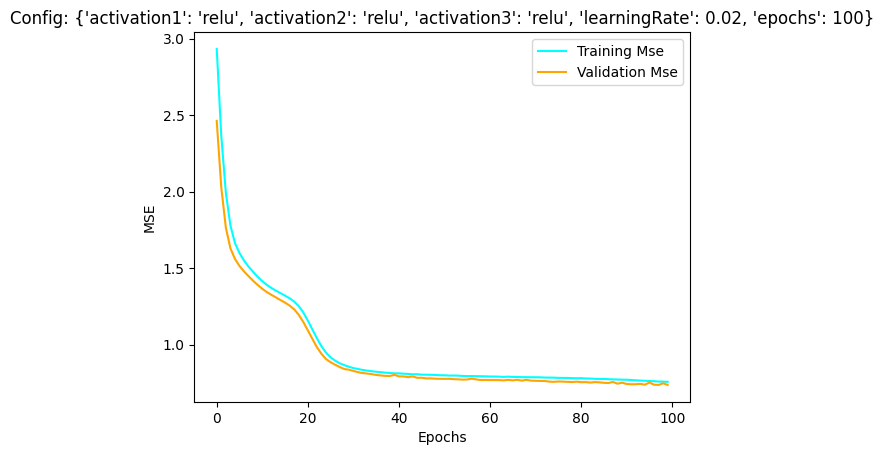

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 1.1703 - mse: 1.1703


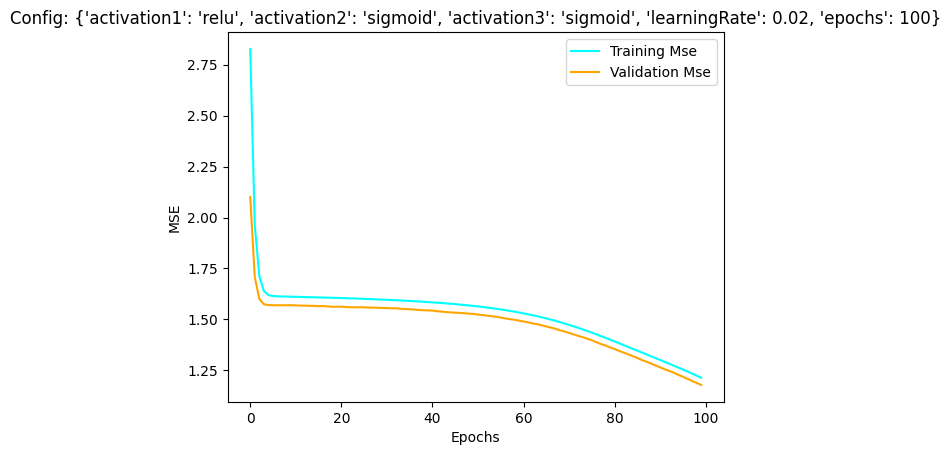

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.6212 - mse: 0.6212


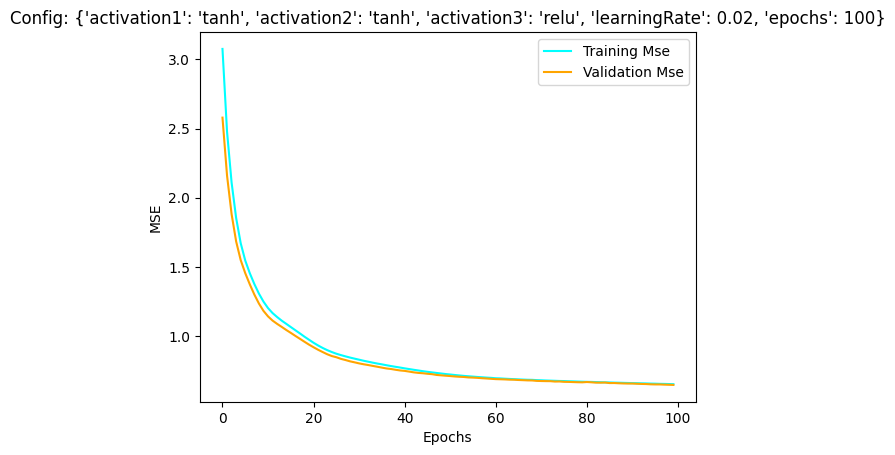

Best configuration: {'activation1': 'tanh', 'activation2': 'tanh', 'activation3': 'relu', 'learningRate': 0.02, 'epochs': 100}
Validation MSE for best config: 0.6482585668563843


In [10]:
# Different configurations
configs = [
    {"activation1": "relu", "activation2": "relu", "activation3": "relu", "learningRate": 0.02, "epochs": 100},
    {"activation1": "relu", "activation2": "sigmoid", "activation3": "sigmoid", "learningRate": 0.02, "epochs": 100},
    {"activation1": "tanh", "activation2": "tanh", "activation3": "relu", "learningRate": 0.02, "epochs": 100},
]

# Store results to find the best parameters
results = []

for config in configs:
    model = models.Sequential()
    model.add(layers.Dense(6, input_shape=(8,), activation=config["activation1"]))
    model.add(layers.Dense(6, activation=config["activation2"]))
    model.add(layers.Dense(6, activation=config["activation3"]))
    model.add(layers.Dense(6, activation='linear'))  # Output layer

    sgd = SGD(learning_rate=config["learningRate"])
    model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

    # Train the model
    history = model.fit(
        np.array(xt),
        np.array(yt),
        validation_data=(np.array(xv), np.array(yv)),
        epochs=config["epochs"],
        batch_size=32,
        verbose = 0
    )

    # Store configuration and final validation error
    valMse, acc = model.evaluate(xv, yv)
    results.append({"config": config, "valMse": valMse})

    # Plotting results for each configuration
    plt.plot(history.history['mse'], label='Training Mse', color='cyan')
    plt.plot(history.history['val_mse'], label='Validation Mse', color='orange')
    plt.title(f"Config: {config}")
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

# Step 7: Choose the best parameters
best_config = min(results, key=lambda x: x["valMse"])
print("Best configuration:", best_config["config"])
print("Validation MSE for best config:", best_config["valMse"])


#### **8. Add new nodes at a time to each hidden layer:**
* Start from the first hidden layer, add two nodes, train, and record results.
* Move to the second hidden layer, add two nodes, train, and record results.
* Move to the third hidden layer, add two nodes, train, and record results.

In [ ]:
# Settings
learningRate = 0.02
epochs = 225
layerActivation = ['tanh', 'tanh', 'relu']
layerNodes = [6, 6, 6]

# Initialize variables to store results
trainMseList = []
valMseList = []
iteration = 0 
maxIterations = 120 # Total iterations

# Iterate through hidden layers
while iteration < maxIterations:
    for n in range(3):
        print("Iteration : ", iteration, " Nodes : ", layerNodes[0], " ", layerNodes[1], " ", layerNodes[2])

        model = models.Sequential()
        model.add(layers.Dense(layerNodes[0], input_shape=(8,), activation=layerActivation[0]))
        model.add(layers.Dense(layerNodes[1], activation=layerActivation[1]))
        model.add(layers.Dense(layerNodes[2], activation=layerActivation[2]))
        model.add(layers.Dense(6, activation='linear'))  # Output layer
            
        # Compile model with fixed learning rate
        sgd = SGD(learning_rate=learningRate)
        model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
        
        # Train model and capture training/validation MSE
        history = model.fit(
            np.array(xt),
            np.array(yt),
            validation_data=(np.array(xv), np.array(yv)),
            epochs=epochs,  
            batch_size=32,
            verbose=0
        )
        
        # Record the final training and validation MSE
        trainMse, acc = model.evaluate(np.array(xt), np.array(yt))
        trainMseList.append(trainMse)
        valMse, acc = model.evaluate(np.array(xv), np.array(yv))
        valMseList.append(valMse)
        
        print("Iteration : ", iteration, " val mse : ", valMseList[iteration])

        layerNodes[n] += 2 # Add nodes to layer
        iteration += 1
        if(iteration >= maxIterations): break

# Plotting results for each configuration
plt.plot(trainMseList, label='Training Sample', color='cyan')
plt.plot(valMseList, label='Validation Sample', color='orange')
plt.title("Variance and Bias Curve")
plt.xlabel('Model Complexity')
plt.ylabel('Prediction Error MSE')
plt.legend()
plt.show()

#### **9. Increase 𝑁t by 10% and repeat Step 8.**

In [ ]:
xt = np.random.uniform(-1, 1, (1100, 8))
yt = np.array([function(x) for x in xt])

# Add noise to the training data 0 , 0.001
noise = np.random.normal(0, 0.001, yt.shape)
yt = yt + noise

# Settings
learningRate = 0.02
epochs = 225
layerActivation = ['tanh', 'tanh', 'relu']
layerNodes = [6, 6, 6]

# Initialize variables to store results
trainMseList = []
valMseList = []
iteration = 0 
maxIterations = 120 # Total iterations

# Iterate through hidden layers
while iteration < maxIterations:
    for n in range(3):
        print("Iteration : ", iteration, " Nodes : ", layerNodes[0], " ", layerNodes[1], " ", layerNodes[2])

        model = models.Sequential()
        model.add(layers.Dense(layerNodes[0], input_shape=(8,), activation=layerActivation[0]))
        model.add(layers.Dense(layerNodes[1], activation=layerActivation[1]))
        model.add(layers.Dense(layerNodes[2], activation=layerActivation[2]))
        model.add(layers.Dense(6, activation='linear'))  # Output layer
            
        # Compile model with fixed learning rate
        sgd = SGD(learning_rate=learningRate)
        model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
        
        # Train model and capture training/validation MSE
        history = model.fit(
            np.array(xt),
            np.array(yt),
            validation_data=(np.array(xv), np.array(yv)),
            epochs=epochs,  
            batch_size=32,
            verbose=0
        )
        
        # Record the final training and validation MSE
        trainMse, acc = model.evaluate(np.array(xt), np.array(yt))
        trainMseList.append(trainMse)
        valMse, acc = model.evaluate(np.array(xv), np.array(yv))
        valMseList.append(valMse)
        
        print("Iteration : ", iteration, " val mse : ", valMseList[iteration])

        layerNodes[n] += 2 # Add nodes to layer
        iteration += 1
        if(iteration >= maxIterations): break

# Plotting results for each configuration
plt.plot(trainMseList, label='Training Sample', color='cyan')
plt.plot(valMseList, label='Validation Sample', color='orange')
plt.title("Variance and Bias Curve")
plt.xlabel('Model Complexity')
plt.ylabel('Prediction Error MSE')
plt.legend()
plt.show()

### **Results:** 

* **Step 8. Result : 1000 xt and 1000 xv Prediction Error/Model complexity graph. Total of 120 Model generated.**

* 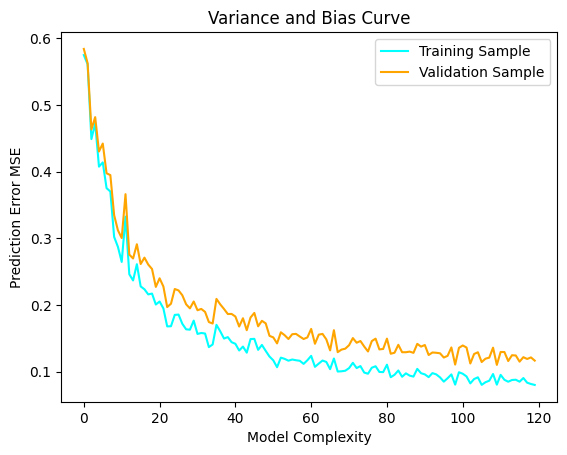

* **Step 9. Result : Nt 10% increased**

* 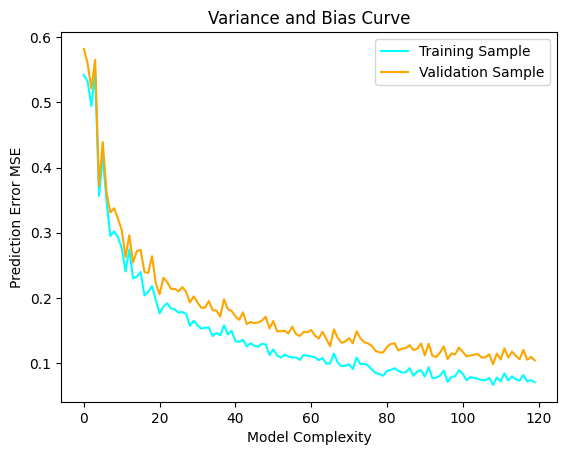

### **Comments and Discussions:**

In the model with three hidden layers, each containing six nodes, it was not possible to train the polynomial to the desired performance level, despite experimenting with different activation functions. In the conducted tests, validation loss and training loss either exhibited similar values or, at times, validation loss appeared lower. This outcome is attributed to the insufficient complexity of the model, as the limited number of nodes does not allow the model to learn the polynomial adequately. Extending the epoch duration or adjusting learning rates only yielded performance gains up to a certain threshold.

Two methods were tested in generating the dataset. The first involved generating 2000 random y values based on x and then splitting this data into validation and training sets. The second method involved generating 1000 random y-values based on x for training, and a separate 1000 random y-values based on x for validation. Logically, there should be no difference in dataset complexity between these two approaches. However, due to certain issues in using Jupyter Notebook, the two datasets initially yielded different results. When the same code was run on a different device, the datasets produced the expected outcomes. This process resulted in a considerable time delay.

In the section requiring experimentation with different activation functions, all combinations of ReLU, tanh, and sigmoid were tested. ReLU activation reliably demonstrated good performance, although it was sensitive to learning rate adjustments and prone to oscillations in the learning curve. The combination of "activation1": "tanh", "activation2": "tanh", "activation3": "relu" yielded the best performance.

In the experiment aimed at establishing the relationship between model complexity and error, increasing validation error at later stages proved challenging. In overfitting scenarios, the model is expected to memorize the training samples, resulting in reduced generalization ability. The training error can be decreased by increasing the number of neurons. However, as the training error decreases, validation error also consistently decreases proportionately. This persisted even with a high number of neurons and extended epochs. It appears that adjusting the number of layers might be necessary to achieve the anticipated error curve.


## **Part 2 Report: 2D Object Recognition using CNNs**

### **Code:**

### **1. Generate your data with 128x128 pixel images.** 
Your data should have salt and pepper noise added in the images. Use only black-and-white colors.

In [ ]:
#imgGenerator.py

import sys
import os
import subprocess
import random

generatorPath = input("2D Image Generator Path: ")

def generate(inx:int, shape:str, pixels:int, movex:int, movey:int, rot:float, scalex:float, scaley:float):
    
    args = [
        'python', generatorPath,
        '--name', str(inx),
        '--shapes', shape,
        '--canvas_size', str(pixels), str(pixels),
        '--stim_trx', str(movex),
        '--stim_try', str(movey),
        '--stim_rota', str(rot),
        '--stim_scale', str(scalex), str(scaley)
    ]
    subprocess.run(args)

def generateRandom(inx:int, shape:str,  pixels = 128, posSigma = 20, maxscale = 2.5, scaleSigma=0.2):

    # Random generation by gaussian
    mx = int(random.gauss(pixels / 2, posSigma))
    my = int(random.gauss(pixels / 2, posSigma))
    mx = min(max(mx, 0), pixels)
    my = min(max(my, 0), pixels)
    
    
    # Scaling can significantly distort the image, keep it similar scx and scy
    # So we need to decide base scale ratio witch affects both x and y scale
    mscl = random.uniform(0.5,maxscale)
    scx = random.gauss(mscl, scaleSigma)
    scy = random.gauss(mscl, scaleSigma)
    scx = max(scx, 0)
    scy = max(scy, 0)
    
    generate(
        inx=inx, 
        shape=shape, 
        pixels=pixels,
        movex=mx, movey=my,
        rot=random.uniform(0, 360),
        scalex=scx, scaley=scy 
        )


def main():

    args = sys.argv[1:]  

    if len(args) < 2:
        print("Not enough arguments") 
        return
    
    output_dir = os.path.join(os.getcwd(), 'output')
    if not os.path.exists(output_dir): os.makedirs(output_dir)    
    
    if len(args) == 3:
        for i in range(int(args[0]),int(args[1])):
            generateRandom(i, args[2])
    else: generateRandom(int(args[0]), args[1])

if __name__ == '__main__':
    main()

* We need dataset/oval , dataset/poly5 ... paths.
* For each path this bash commands will generate 500 random images for $nm folder.

```bash
#!/bin/bash
dir=$(pwd)

nm="oval"
cmd="ellipse"

cd "$dir/dataset/$nm"  
python ../../imgGenerator.py 0 500 $cmd
rm -rf output

i=1
for file in *.png; do
    echo "Renaming ${nm}_${i}.png" 
    mv "$file" "${nm}_${i}.png"
    ((i++))
done
```

* 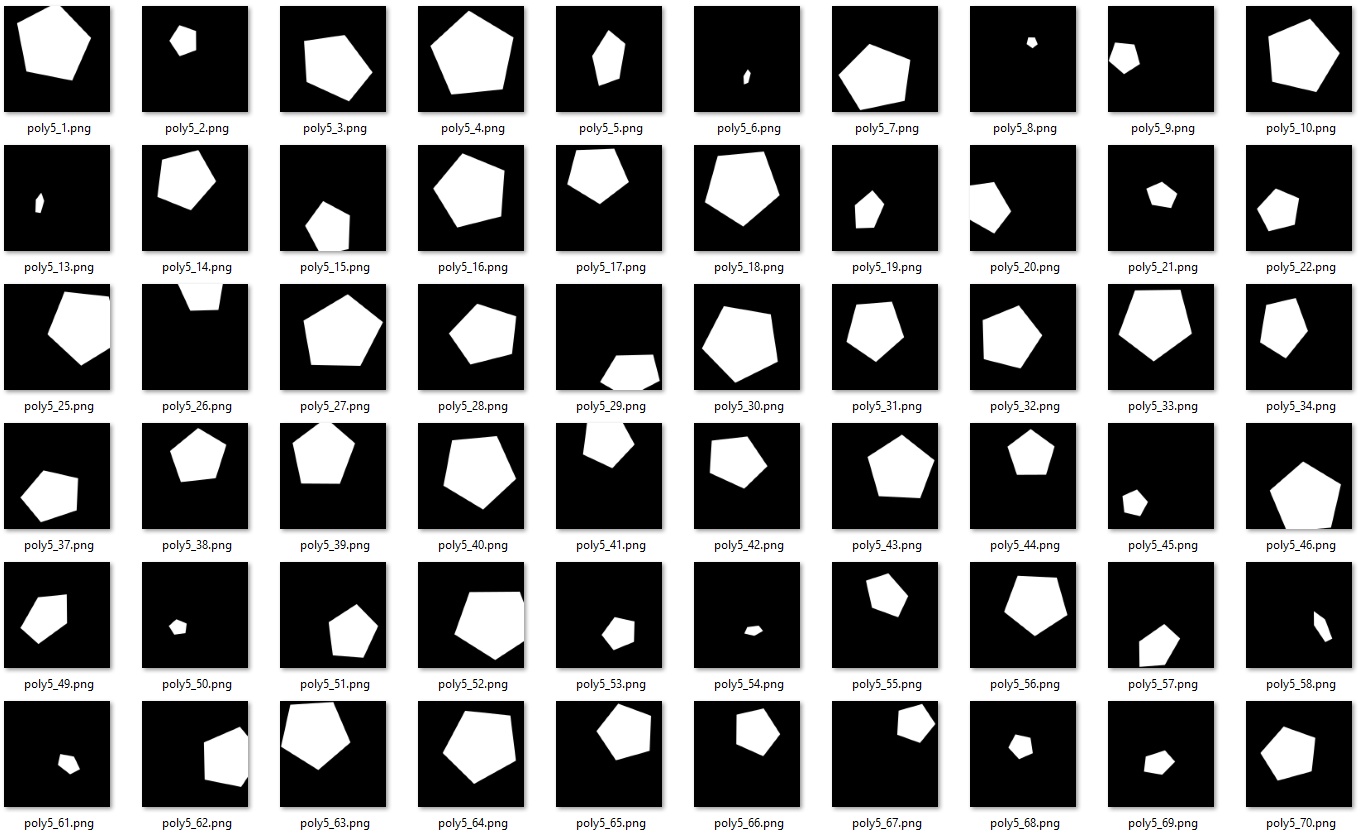

#### **2. Start with the AlexNet model.** 
* Change the input layer to handle grayscale images. Change the
* number of outputs to the right number of object classes.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, utils
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.optimizers import Adam

# Dataset path
datasetPath = input("DatasetPath")

batchSize = 32
imgSize = (128, 128)

# Training data generator with validation split
trainDataset = utils.image_dataset_from_directory(
    datasetPath,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batchSize,
    image_size=imgSize,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

# Validation data generator
validationDataset = utils.image_dataset_from_directory(
    datasetPath,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=batchSize,
    image_size=imgSize,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

# Add normalization (Rescaling) layer to your data pipeline
trainDataset = trainDataset.map(lambda x, y: (x / 255.0, y))  # Normalize to [0, 1]
validationDataset = validationDataset.map(lambda x, y: (x / 255.0, y))  # Normalize to [0, 1]

Found 4000 files belonging to 8 classes.
Using 3200 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.



#### **3. Train the network with the data and report results.**
* a. Use at least two different learning rate adjustment schemes.
* b. Use at least three different activation functions.

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_495 (Dense)               │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_496 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_497 (Dense)               │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,305,160 (16.42 MB)

 Trainable params: 4,305,160 (16.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.1308 - loss: 2.0793 - val_accuracy: 0.2175 - val_loss: 1.9752
Epoch 2/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.2307 - loss: 1.8590 - val_accuracy: 0.3975 - val_loss: 1.3607
Epoch 3/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.3800 - loss: 1.4303 - val_accuracy: 0.5138 - val_loss: 1.1550
Epoch 4/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4308 - loss: 1.2980 - val_accuracy: 0.5525 - val_loss: 1.0951
Epoch 5/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5214 - loss: 1.1280 - val_accuracy: 0.6450 - val_loss: 0.9462
Epoch 6/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5589 - loss: 1.0411 - val_accuracy: 0.6525 - val_loss: 0.9167
Epoch 7/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6062 - loss: 0.9226 - val_accuracy: 0.7113 - val_loss: 0.8122
Epoch 8/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6238 - loss: 0.8698 - val_acc

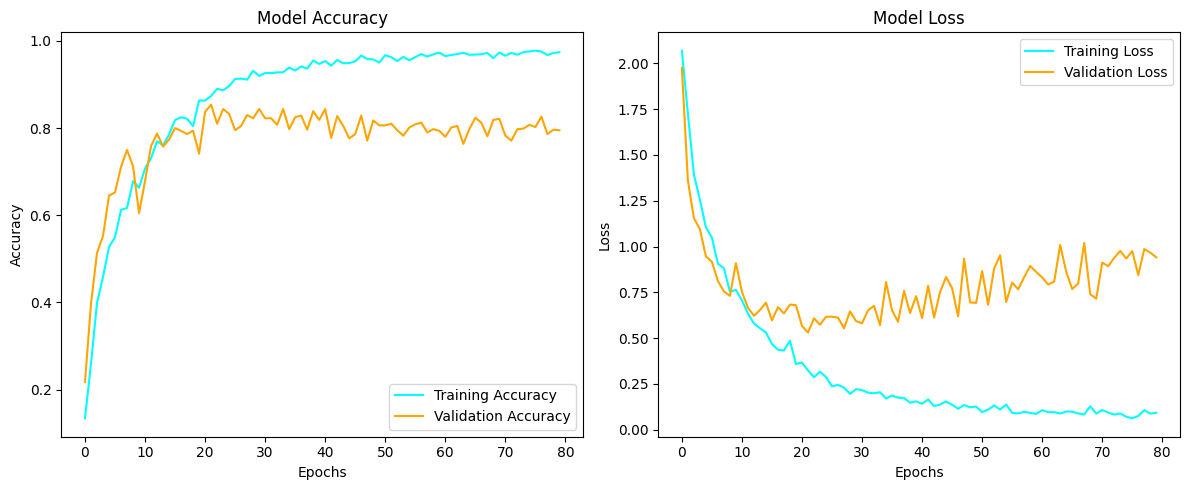

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, utils
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.optimizers import Adam

#  AlexNet Model with reduced complexity
model = models.Sequential()

# Input layer: 128x128 grayscale images (1 channel)
model.add(layers.InputLayer(input_shape=(128, 128, 1)))

# Conv1: 5x5 kernel, 32 filters (Smaller filters and reduced filters)
model.add(layers.Conv2D(32, (5, 5), strides=2, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Conv2: 3x3 kernel, 64 filters (Reduce the number of filters)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Conv3: 3x3 kernel, 128 filters (Reduce the number of filters)
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers (FC)
model.add(layers.Dense(128, activation='relu'))  # Reduced from 4096 to 128
model.add(layers.Dropout(0.5))                      # Dropout layer to avoid overfitting
model.add(layers.Dense(128, activation='relu'))  # Reduced from 4096 to 128
model.add(layers.Dropout(0.5))

# Output layer: 8 classes (assuming 8 shape classes)
model.add(layers.Dense(8, activation='softmax'))  # Softmax for multi-class classification

# Compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary to check the architecture
model.summary()

# Training the model with updated steps per epoch
history = model.fit(
    trainDataset,
    epochs=80,
    validation_data=validationDataset,
)

# Plotting performance: Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='cyan')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 164)            │     5,374,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 164)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 164)            │        27,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 164)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         1,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,495,680 (20.96 MB)

 Trainable params: 5,495,680 (20.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.1354 - loss: 2.0803 - val_accuracy: 0.1663 - val_loss: 2.0394
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.1674 - loss: 2.0263 - val_accuracy: 0.2237 - val_loss: 1.7381
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.2823 - loss: 1.6963 - val_accuracy: 0.4712 - val_loss: 1.3064
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.4263 - loss: 1.3825 - val_accuracy: 0.4900 - val_loss: 1.2274
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.4486 - loss: 1.2839 - val_accuracy: 0.5013 - val_loss: 1.1626
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.5402 - loss: 1.0873 - val_accuracy: 0.6225 - val_loss: 0.9606
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.6003 - loss: 0.9778 - val_accuracy: 0.6150 - val_loss: 0.9439
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.6196 - loss: 0.

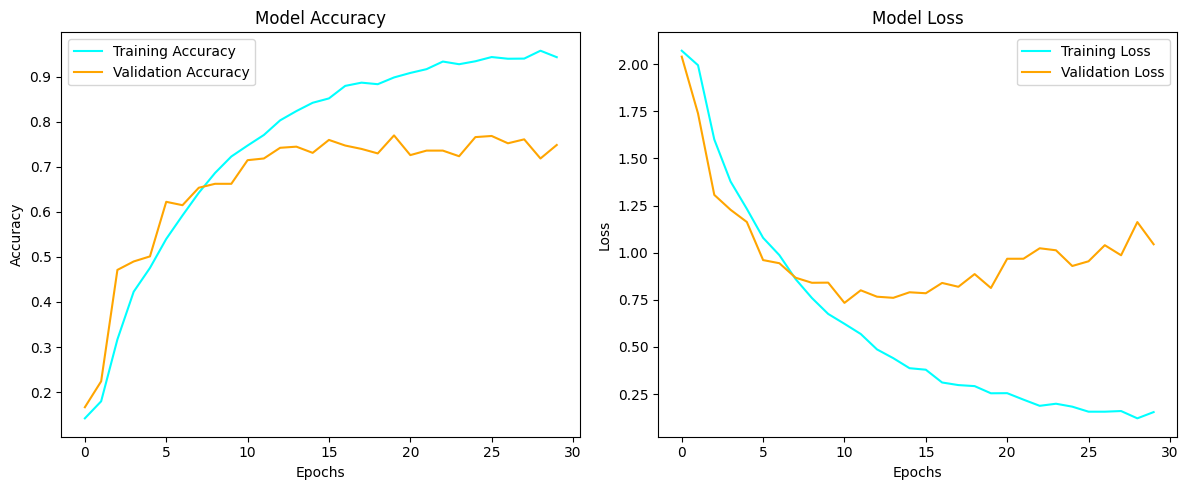

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, utils
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.optimizers import Adam

#  AlexNet Model with reduced complexity
model = models.Sequential()

# Input layer: 128x128 grayscale images (1 channel)
model.add(layers.InputLayer(input_shape=(128, 128, 1)))

# Conv1: 5x5 kernel, 32 filters (Smaller filters and reduced filters)
model.add(layers.Conv2D(32, (5, 5), strides=2, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Conv2: 3x3 kernel, 64 filters (Reduce the number of filters)
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Conv3: 3x3 kernel, 128 filters (Reduce the number of filters)
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers (FC)
model.add(layers.Dense(164, activation='relu')) 
model.add(layers.Dropout(0.5))                
model.add(layers.Dense(164, activation='relu'))  
model.add(layers.Dropout(0.5))

# Output layer: 8 classes (assuming 8 shape classes)
model.add(layers.Dense(8, activation='softmax'))  # Softmax for multi-class classification

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the new learning rate
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary to check the architecture
model.summary()

# Training the model with updated steps per epoch
history = model.fit(
    trainDataset,
    epochs=30,
    validation_data=validationDataset,
)

# Plotting performance: Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='cyan')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### **Results:**

* Sigmoid functions does not show performance at fully connected layers:

* After 20 epochs, model overfits the data:


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\berki\Desktop\YeniaySrc\WorkspaceAI\DeepLearning\Homework1\img\AlexNet_sigmoid_sigmoid_relu.png")
plt.imshow(img)
plt.axis("off")  # İsteğe bağlı, eksenleri gizler
plt.show()


### **Comments and Discussions:**

The generation of images containing eight classes requires the introduction of a specific type of noise. The size and diversity of the dataset play a significant role in the training of the model. 2D Shape Generator https://github.com/TimoFlesch/2D-Shape-Generator repo used for dataset generation.

In the initial experiment, a total of 800 images were generated, with 100 images per class. The number of nodes in the AlexNet architecture was kept as is. This approach resulted in both time inefficiencies and excessive fluctuation during model training. It was observed that architectures with a large number of nodes exhibit unstable behavior when trained on small datasets.

Subsequently, the dataset was expanded to include 500 images per class. During this expansion, more attention was paid to the randomness of the shapes within the images. In the code that generates random shapes, Gaussian distribution was employed instead of uniform distribution to ensure that the expected shape appearance occurred more frequently. In the initial dataset, almost all of the images exhibited a high degree of randomness, deviating significantly from the expected shape. As the dataset consisted of .png files, iterative adjustments were made to fine-tune the randomness of the images, bringing them closer to a balanced state. The term "balanced" refers to the equilibrium between the frequency of expected shapes and the occurrence of random noisy shapes.
